<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

1. Производная: $\nabla_{w}Q(w)=2\lambda w-2x(y-xw)$; оптимальное $w=\frac{xy}{x^2+\lambda}$.
2. $\nabla_{w}^2Q(w)=2\lambda+2x^2$, при $\lambda>0$ получаем $\nabla_{w}^2Q(w)>0$, что является точкой минимума.
3. $w_{t+1}=w_{t}-\eta (2X^T(Xw_{t}-y)+2\lambda w_{t})$

## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [x] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [x] Задайте стартовые точки x0, равные 0, 0.5, 1
- [x] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [x] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?

In [2]:
import random

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [3]:
def f(x):
    return x * np.sin(5*x) + 0.1 * x**2

def df(x):
    return np.sin(5*x) + np.cos(5*x) * 5 * x + 0.2 * x

def gradient_descent(x0, eta=0.001, max_iter=1_000, stop=1e-6):
    path = []
    x_current = x0
    
    for i in range(max_iter):
        path.append(x_current)
        
        x_new = x_current - eta * df(x=x_current)
        
        if abs(x_new - x_current) < stop:
            path.append(x_current)
            
            return x_current, path
        
        x_current = x_new
        
    return x_current, path

def find_min_max_points(x0, eta=0.001, max_iter=1_000, stop=1e-6):
    local_minimum = gradient_descent(x0=x0)[0]
    x_current = x0
    
    for i in range(max_iter):
        x_new = x_current + eta * df(x=x_current)
        
        if abs(x_new - x_current) < stop:
            local_maximum = x_current
            
            return local_minimum, local_maximum
        
        x_current = x_new

    local_maximum = x_current
    
    return local_minimum, local_maximum

In [4]:
x0, path0 = gradient_descent(x0=0)
x1, path1 = gradient_descent(x0=0.5)
x2, path2 = gradient_descent(x0=1)

local_minimum0, local_maximum0 = find_min_max_points(x0=0)
local_minimum1, local_maximum1 = find_min_max_points(x0=0.5)
local_minimum2, local_maximum2 = find_min_max_points(x0=1)

In [6]:
x0, x1, x2 , path0, path1, path2

(0,
 0.975060876515715,
 0.9751376478508075,
 [0, 0],
 [0.5,
  0.5013043868947634,
  0.50262871628548,
  0.5039732826996968,
  0.505338383290982,
  0.506724317730896,
  0.5081313880904593,
  0.509559898710535,
  0.5110101560605197,
  0.5124824685847187,
  0.5139771465357561,
  0.5154945017943534,
  0.5170348476747887,
  0.5185984987153273,
  0.5201857704529,
  0.5217969791812841,
  0.5234324416920272,
  0.5250924749973417,
  0.5267773960341817,
  0.5284875213487061,
  0.5302231667603227,
  0.5319846470045044,
  0.5337722753535656,
  0.535586363214589,
  0.5374272197037004,
  0.539295151195899,
  0.5411904608496653,
  0.5431134481055938,
  0.545064408158321,
  0.547043631401056,
  0.5490514028420643,
  0.5510880014925008,
  0.5531536997250515,
  0.5552487626029072,
  0.5573734471786727,
  0.5595280017629016,
  0.5617126651620487,
  0.5639276658857402,
  0.5661732213233905,
  0.5684495368903273,
  0.5707568051437397,
  0.5730952048689322,
  0.57546490013654,
  0.5778660393315644,
  0.580

<Axes: >

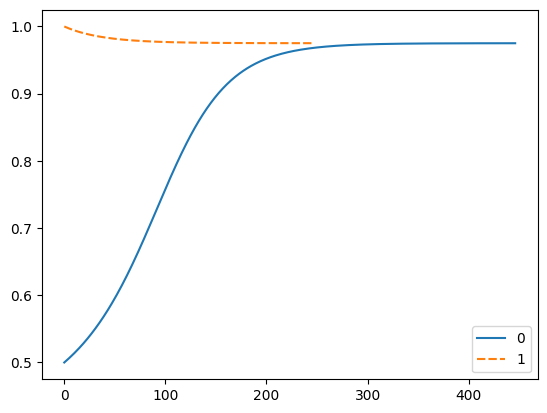

In [8]:
sns.lineplot(data=[path1, path2])

In [10]:
(local_minimum0, local_maximum0), (local_minimum1, local_maximum1), (local_minimum2, local_maximum2)

((0, 0),
 (0.975060876515715, 0.41185702181234396),
 (0.9751376478508075, 1.6035293061150784))

`Функциянаходит локальные минимумы и максимумы. Для каждой точки будет свой локальный минимум, вероятнее всего это связано с формой функции. При начальных точках равных 0.5 и 1 экстремумы почти совпадают.`

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [11]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [12]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)    
    return cost

def compute_cost_derivative_sgd(X, y, theta):
    error = X @ theta - y
    gradient = 2 * error * X
    return gradient

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    cost_track = np.zeros(shape=(iterations, 1))
    j = 0

    for i in range(iterations):
        j = np.random.randint(low=0, high=len(X)-1)
        gradient = compute_cost_derivative_sgd(X=X[j], y=y[j], theta=params)
        params = params - learning_rate * gradient
        cost_track[i] = compute_cost(X=X, y=y, theta=params)
    return params, cost_track

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [13]:
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [14]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

def compute_cost_derivative_gd(X, y, theta):
    m = len(y)
    error = X @ theta - y 
    gradient = (2 / m) * X.T @ error
    return gradient
    
def gd(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    cost_track = np.zeros(shape=(iterations, 1))

    for i in range(iterations):
        gradient = compute_cost_derivative_gd(X=X, y=y, theta=params)
        params = params - learning_rate * gradient
        cost_track[i] = compute_cost(X=X, y=y, theta=params)
    return params, cost_track

In [15]:
X, y, _ = make_regression(
    n_samples=100000,
    n_features=10,
    n_informative=8,
    noise=100,
    coef=True,
    random_state=123
)
X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random() * 0.01

In [16]:
%%time


w_ols = ols_solution(X=X, y=y)

CPU times: user 77.8 ms, sys: 34.5 ms, total: 112 ms
Wall time: 30 ms


CPU times: user 7min 49s, sys: 4min 17s, total: 12min 6s
Wall time: 2min 41s


<Axes: >

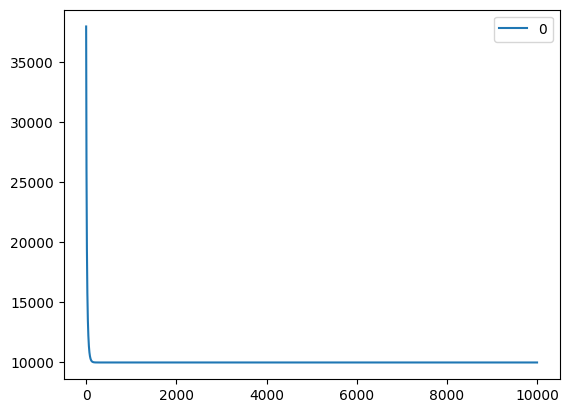

In [17]:
%%time


w_gd, cost_track_gd = gd(
    X=X,
    y=y,
    learning_rate=0.01, 
    iterations=10_000
)

sns.lineplot(data=cost_track_gd)

CPU times: user 2min 28s, sys: 1min 9s, total: 3min 38s
Wall time: 52.1 s


<Axes: >

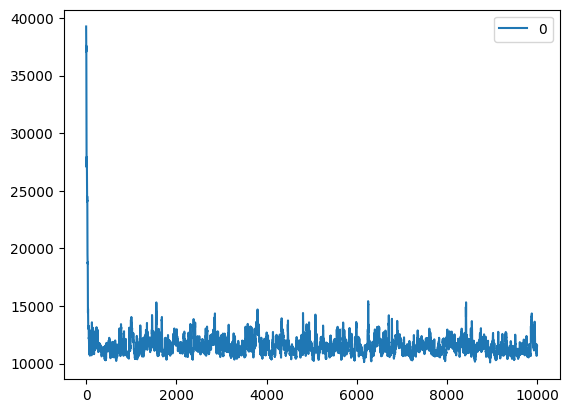

In [18]:
%%time


w_sgd, cost_track_sgd = stochastic_gradient_descent(
    X=X,
    y=y,
    learning_rate=0.01, 
    iterations=10_000
)

sns.lineplot(data=cost_track_sgd)

In [19]:
y_pred_ols = prediction(X=X, w=w_ols)
y_pred_gd = prediction(X=X, w=w_gd)
y_pred_sgd = prediction(X=X, w=w_sgd)

In [20]:
print('R^2')
print(f'OLS: {r2_score(y_true=y, y_pred=y_pred_ols)}')
print(f'GD: {r2_score(y_true=y, y_pred=y_pred_gd)}')
print(f'SGD: {r2_score(y_true=y, y_pred=y_pred_sgd)}')

R^2
OLS: 0.7547225492295591
GD: 0.7554626185750483
SGD: 0.7181227645478541


1. Сумели обнаружить минимум все модели. Качество SGD оказалось хуже, что, в приципе, было ожидаемо.
2. Самое быстрое выполнение -  OLS,  самое медленное - GD.
3. Графики построены.
4. Лучшее качество у GD.

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [21]:
def sgd_l2(X, y, learning_rate, iterations, C):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    cost_track = np.zeros(shape=(iterations, 1))
    j = 0

    for i in range(iterations):
        j = np.random.randint(low=0, high=len(X)-1)
        gradient = compute_cost_derivative_sgd(X=X[j], y=y[j], theta=params)
        params = params - learning_rate * (gradient + 2 * C * params)
        cost_track[i] = compute_cost(X=X, y=y, theta=params)

    return params, cost_track

In [22]:
for C in np.arange(start=0.1, stop=1.1, step=0.1):
    w_sgd_l2, cost_track_sgd_l2 = sgd_l2(
        X=X,
        y=y,
        learning_rate=0.01, 
        iterations=10_000,
        C=C
    )
    
    y_pred_sgd_l2 = prediction(X=X, w=w_sgd_l2)
    
    print(f'SGD-L2 (C={C}): {r2_score(y_true=y, y_pred=y_pred_sgd_l2)}')

SGD-L2 (C=0.1): 0.7211437721310247
SGD-L2 (C=0.2): 0.728508422488175
SGD-L2 (C=0.30000000000000004): 0.6791376143547061
SGD-L2 (C=0.4): 0.677163086817743
SGD-L2 (C=0.5): 0.6279242315442972
SGD-L2 (C=0.6): 0.6831466874306382
SGD-L2 (C=0.7000000000000001): 0.6835188958348055
SGD-L2 (C=0.8): 0.6049136742231145
SGD-L2 (C=0.9): 0.6480081938112965
SGD-L2 (C=1.0): 0.6073120578224798


`Наилучшее качество получилось для C = 0.2. Есть ощущение, что по мере увеличения С модель начинает крайне сильно штрафовать, что не позволяет добиться лучшего результата при обучении`

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [23]:
def momentum_gd(X, y, learning_rate, iterations, C):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params_current = np.random.rand(X.shape[1])
    velocity = np.zeros_like(params_current)
    cost_track = np.zeros(iterations)

    for i in range(iterations):
        gradient = compute_cost_derivative_gd(X=X, y=y, theta=params_current)
        velocity = C * velocity - learning_rate * gradient
        params_current = params_current + velocity
        cost_track[i] = compute_cost(X=X, y=y, theta=params_current)

    return params_current, cost_track

In [24]:
w_momentum_gd, cost_trackmomentum_gd = momentum_gd(
    X=X,
    y=y,
    learning_rate=0.01, 
    iterations=10_000,
    C=0.1
)

y_pred_momentum_gd = prediction(X=X, w=w_momentum_gd)

print(f'Momentum GD: {r2_score(y_true=y, y_pred=y_pred_momentum_gd)}')

Momentum GD: 0.7554626185750482


## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

`Использование производной первого порядка менее затратная операция, в сравнении с методом Ньютона. Судя по источникам метод Ньютона должен быть немного точнее метода градиентного спуска, но этот плюс невилируется предложением ранее`

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

`Кот Сабрины`